In [4]:
from matplotlib import pyplot as plt
import cv2 as cv
import numpy as np
import os

In [5]:
dbDir =os.getcwd()+"\gabor\\"
people = os.listdir(dbDir)
people.sort()
dbDir= r'/'.join(dbDir.split("\\"))
for person in people:
    personDir = dbDir + person

ss="rain in Spain falls mainly in the plain."
s=ss.split(" ",20);

C:\Myprogram\feature\gabor\


(-0.5, 654.5, 1036.5, -0.5)

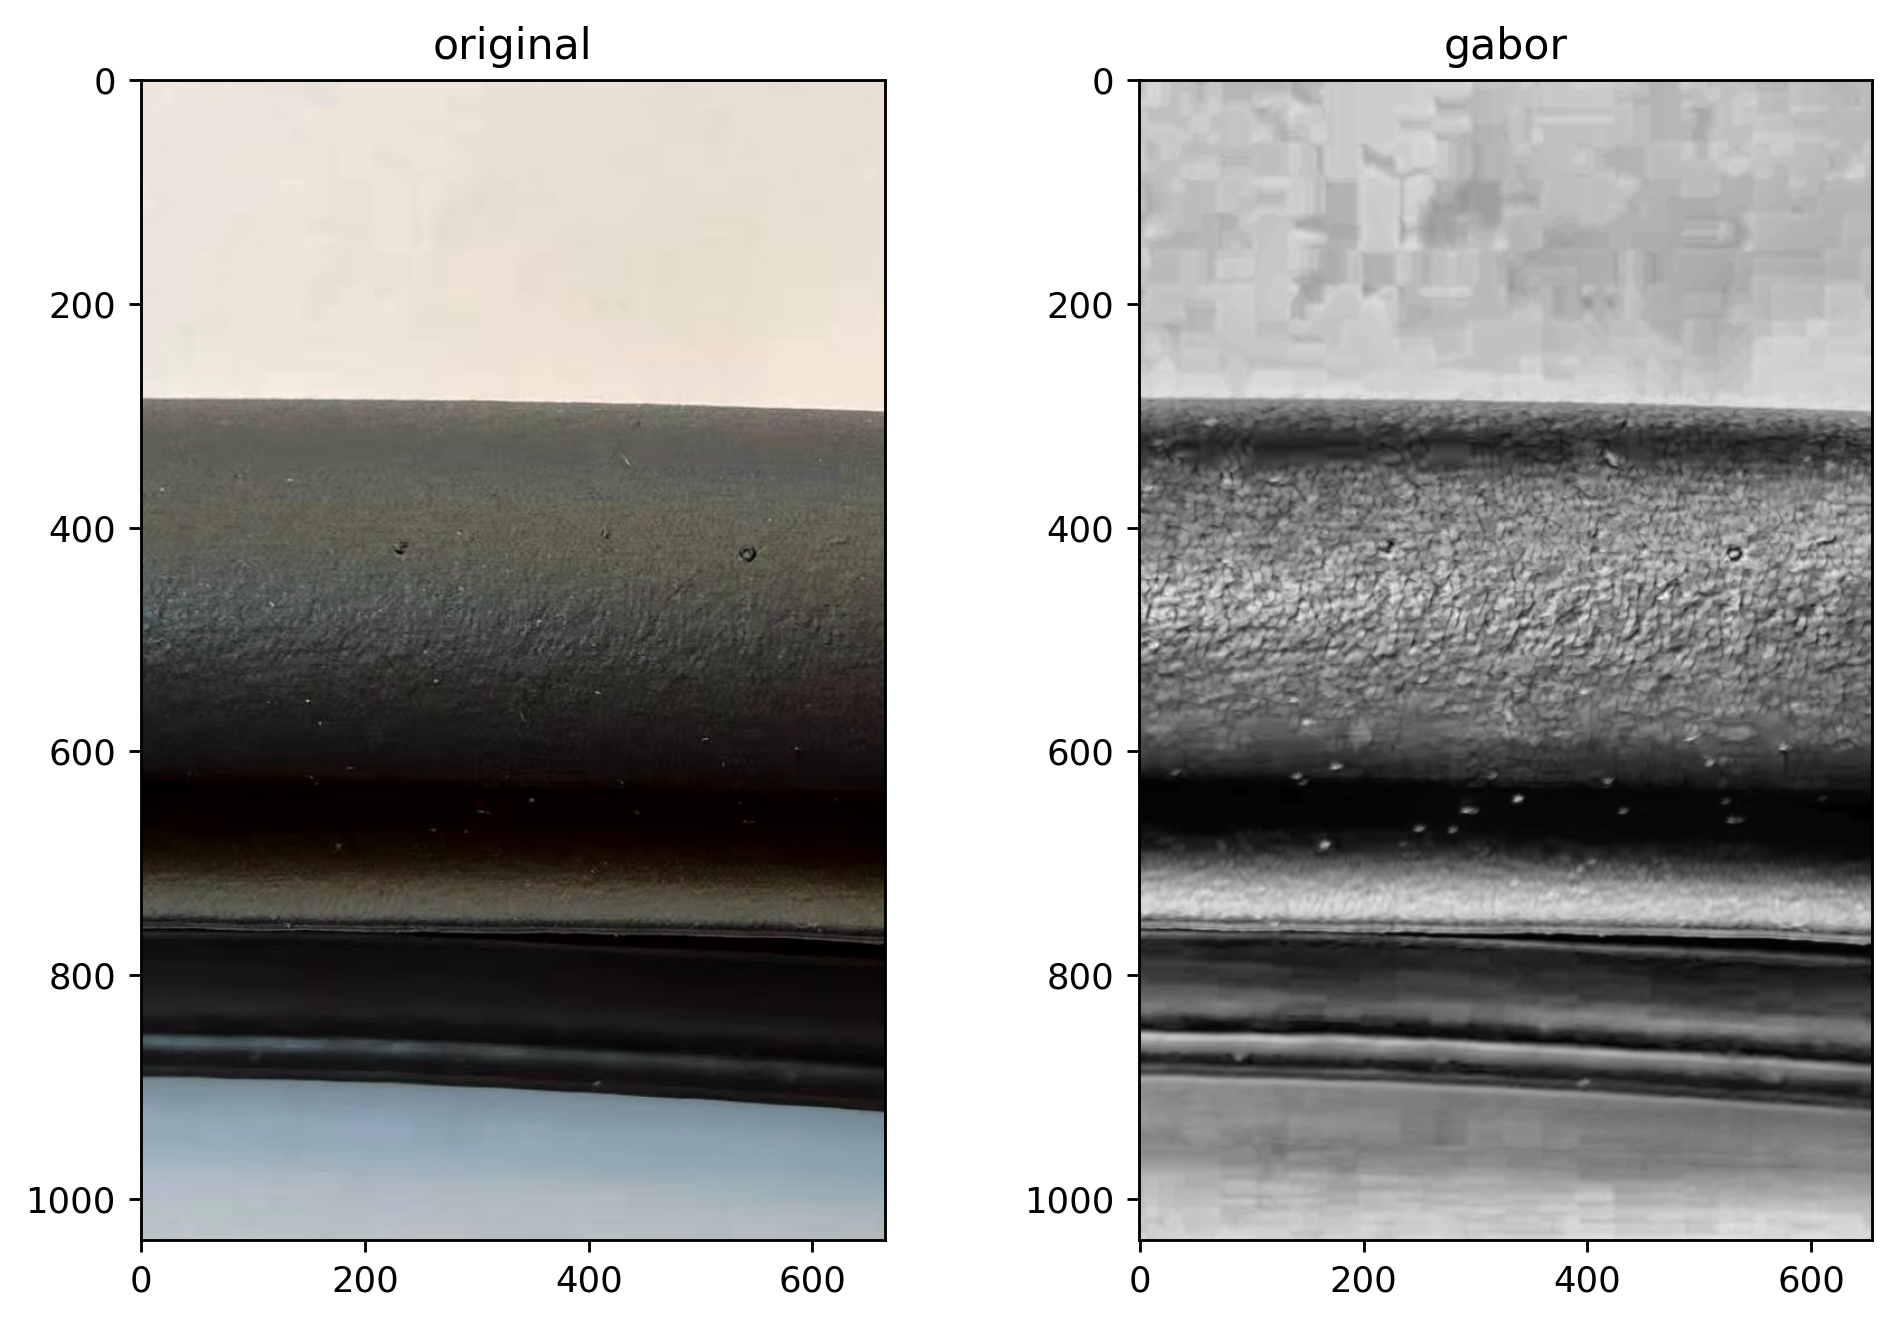

In [6]:
def pathFile(path):
    return os.getcwd() + '/' + path

def brightestColumn(img):
    w, h = img.shape
    r = range(int(h / 2), h - 1)
    c = range(0, w - 1)
    return img[c][:,r].sum(axis=0).argmax()

#构建GABOR滤波器
def build_filters():
    """ returns a list of kernels in several orientations
    """
    filters = []
    ksize = 31                                                                 
    for theta in np.arange(0, np.pi, np.pi / 4):                             
        
        params = {'ksize':(ksize, ksize), 'sigma':3.3, 'theta':theta, 'lambd':18.3,    
                  'gamma':4.5, 'psi':0.89, 'ktype':cv2.CV_32F}                                                                   
        kern = cv.getGaborKernel(**params)                         
        kern /= 1.5*kern.sum()
        filters.append((kern,params))
    return filters                                                          

#滤波过程
def process(img, filters):
    """ returns the img filtered by the filter list
    """
    accum = np.zeros_like(img)                                            
    for kern,params in filters:
        fimg = cv.filter2D(img, cv.CV_8UC3, kern)                      
        np.maximum(accum, fimg, accum)                             
    return accum


def getRoiHCut2(img, p0):
    h, w = img.shape
    #plt.show(img)
    maxTop = np.argmax(img[0: round(h // 2), 0])                                   
    minTop = np.argmax(img[0: round(h // 2), w-1])
    if(maxTop < 65):
        maxBottom = np.argmax(img[(13 *round(h //16 )): 40*round(h //48 ), 0]) + 3 * h // 4
        minBottom = np.argmax(img[(13 *round(h //16 )): 40*round(h //48 ), w-1]) + 3 * h // 4
    else:
        maxBottom = np.argmax(img[(3 *round(h //4 )): h  , 0]) + 3 * h // 4
        minBottom = np.argmax(img[(3 *round(h //4 )): h, w-1]) + 3 * h // 4
    maxTop =round((2*maxTop + minTop) // 3)
    maxBottom = round((maxBottom + 2*minBottom) // 3)
 
    return img[maxTop:maxBottom,:]
    

#获取感兴趣区域范围
def getRoi(img):
    height, width = img.shape 
    heightDist =round(height // 4)
    w = img.copy()
    w1 = w[heightDist:3 * heightDist,round(width // 4):]
    p0 =brightestColumn(w1) + heightDist +height // 2             
    pCol = w[:,p0:p0 + 1]
    pColInv = pCol[::-1]
    clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))                
    w1_2 = clahe.apply(w[:, round(p0 //20):round(p0 + p0 // 2)])                 
    w2 = getRoiHCut2(w1_2, p0)
    res = cv.resize(w2, (270, 150), interpolation=cv.INTER_CUBIC)

    return clahe.apply(res)

def getRoii(img):
    height, width = img.shape

    heightDist=height
    w = img.copy()
    w1=w
    p0 =heightDist    
    pCol = w[:,p0:p0 + 1]
    pColInv = pCol[::-1]
    clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)) 
    w1_2 = clahe.apply(w[:,(p0 //100):(p0 + p0 // 1)])
    return clahe.apply(w1_2)

def logImg(img):
    return img.astype(float) // 255                                

mDir=[]
imgs = []
mDir = os.getcwd() + "\gabor\\"
print(mDir)
people = os.listdir(mDir)
people.sort()


filters = build_filters()
imgs='gabor/11.jpg'
sf=imgs
imgs=cv.cvtColor(cv.imread(imgs), cv.COLOR_BGR2GRAY)
res0 = process(getRoii(imgs), filters)
cv.imwrite(sf+ ".jpg", res0)

plt.figure(dpi=256,figsize=(10,6))
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.002,hspace=0.005)
plt.subplot(1,2,1)
plt.title('original')
plt.imshow(cv.imread(filename='gabor/11.jpg'))

plt.axis('on')
plt.subplot(1,2,2)
plt.title('gabor')
plt.imshow(res0,cmap=plt.cm.gray)
plt.axis('on')